In [1]:
from scipy.io.wavfile import read as read_wav
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import utils

C:\Users\Charl\AppData\Local\Temp\ipykernel_17280\2751349473.py:13: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram, ax=axes[1])


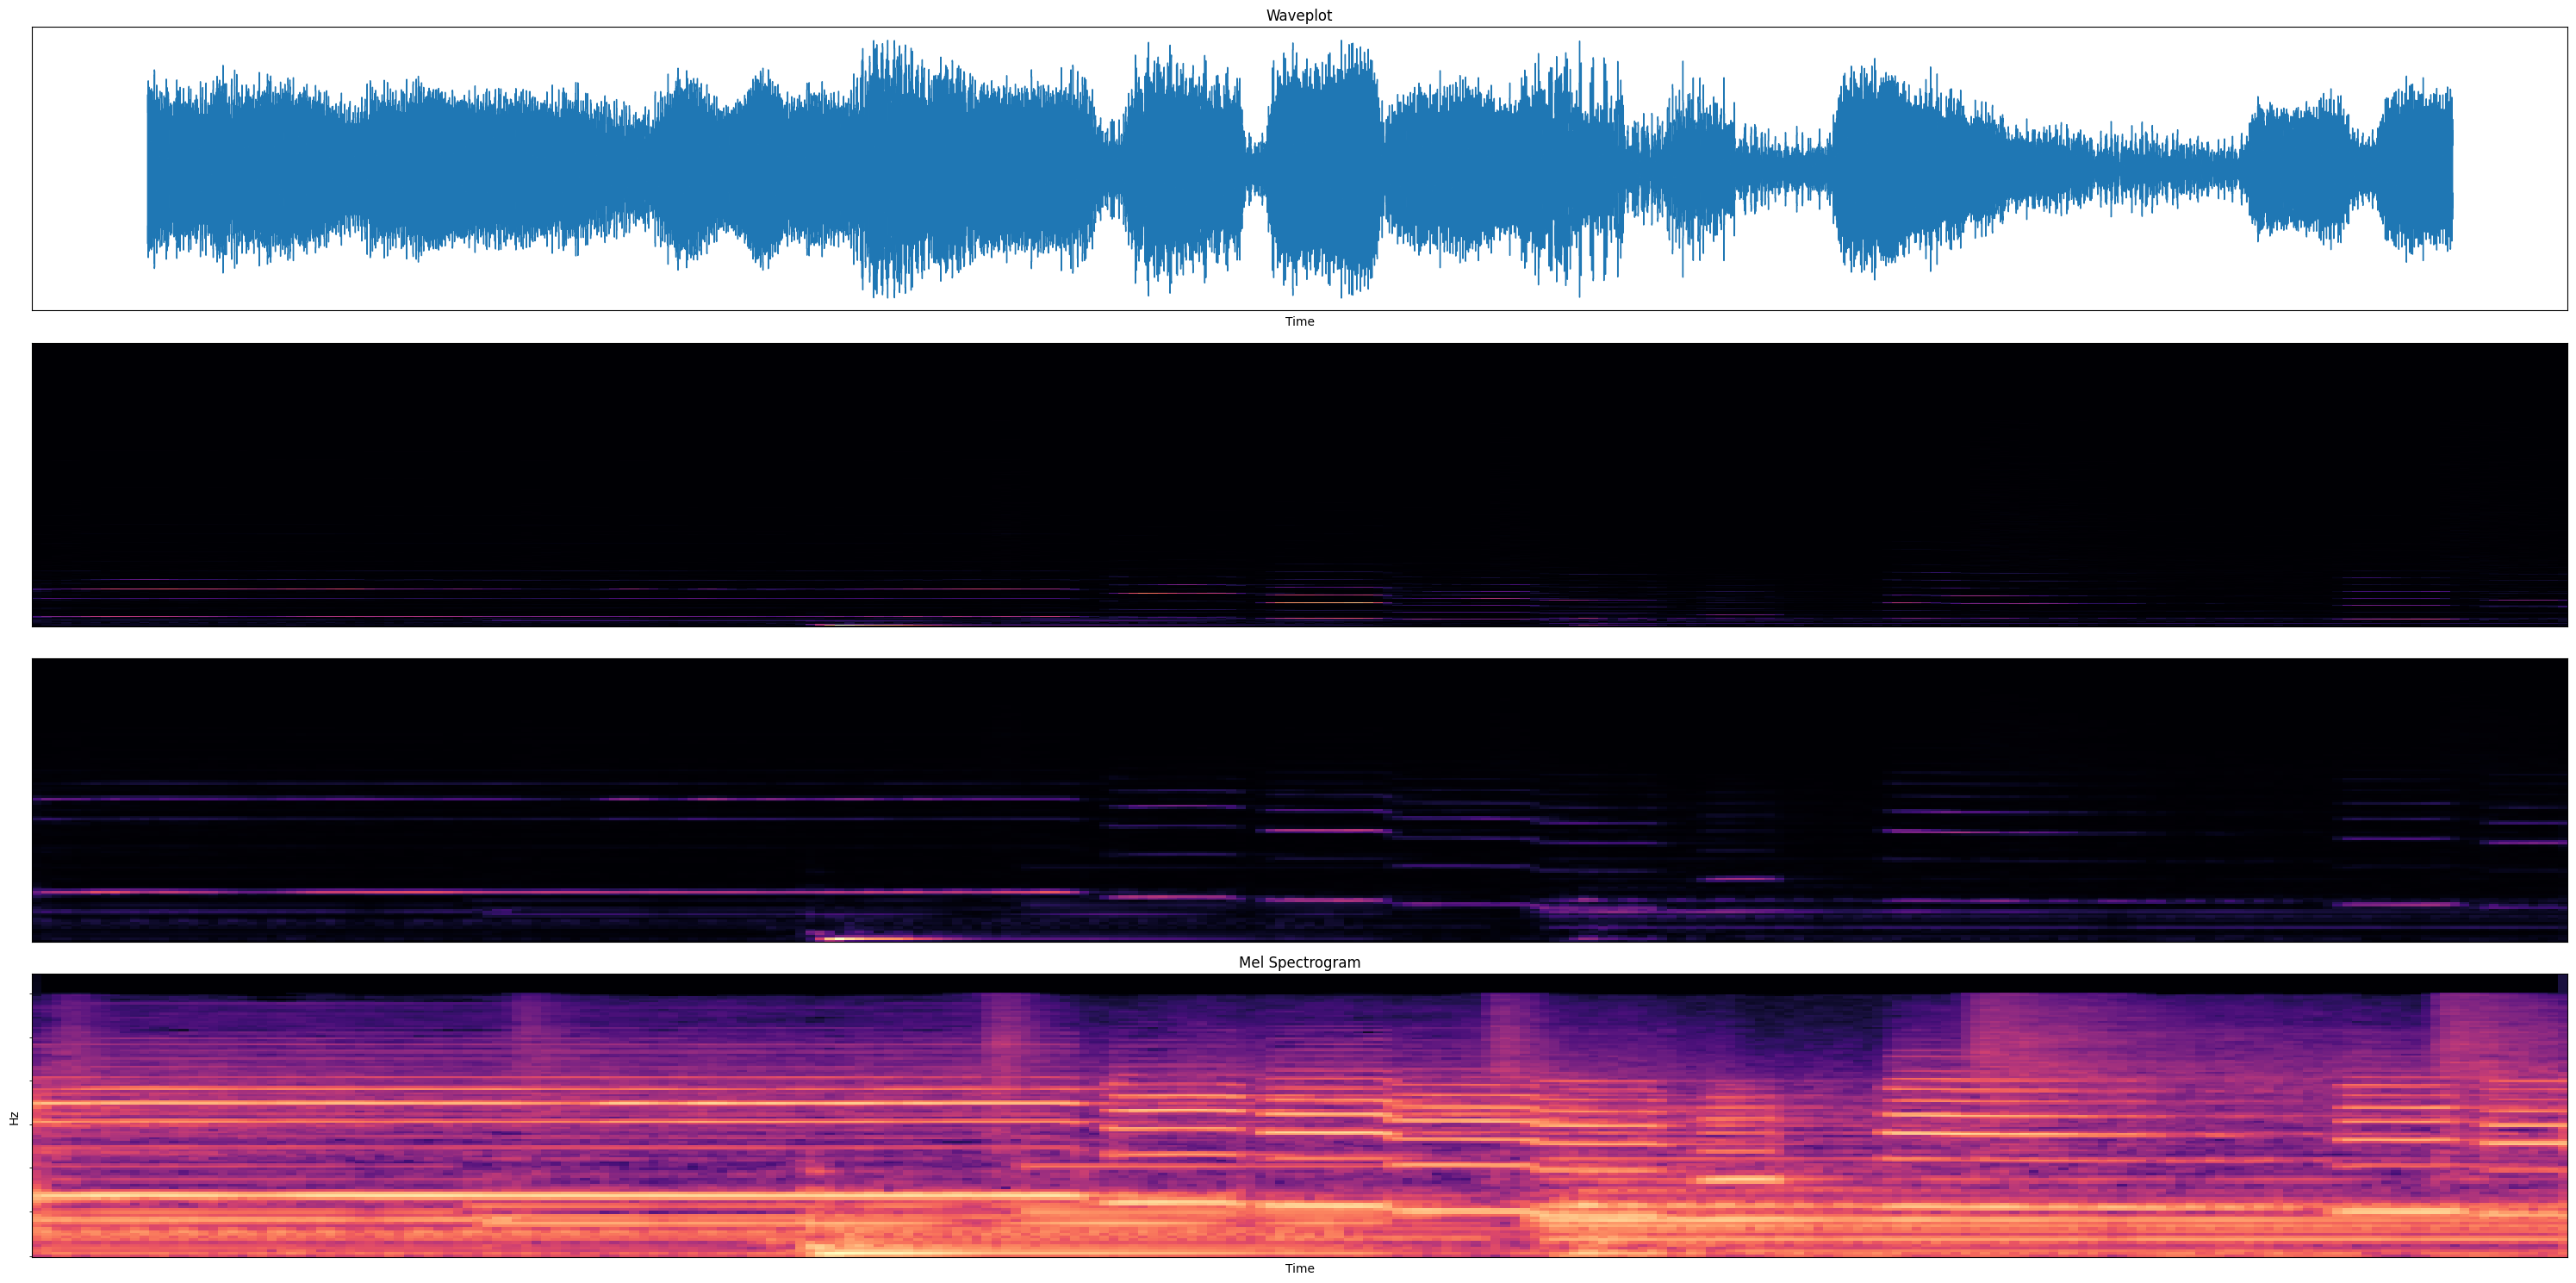

In [2]:
fig, axes = plt.subplots(nrows=4, figsize=(30, 15))

audio_file = './data/test1.wav'
samples, sample_rate = librosa.load(audio_file, sr=None)

librosa.display.waveshow(samples, sr=sample_rate, ax=axes[0])
axes[0].set_title('Waveplot')
axes[0].set_xticks([])  # Hide x-axis ticks
axes[0].set_yticks([])  # Hide y-axis ticks


sgram = librosa.stft(samples)
librosa.display.specshow(sgram, ax=axes[1])
# Spectogram is a concise snapshot of an audio wave and since it's an image,
# it's well suited to being input to CNN-based architectures

# Chops up the duration of the sound signal into smaller time segments and then 
# applies the Fourier Transform to each segment, to determine the frequencies
# contained in that segment.
# It then combines the Fourier Transforms for all those segments into a single



# There's not muuch information for us to see
# It's the human perceive sound, which is a narrow range of frequencies and amplitude

# Mel scale can help solve such problems (TODO Research into and reference)
# It's a scale of pitches, such that each unit is judged by listeners to be 
# equal in pitch distance from the next

# It uses the Mel Scale instead of Frequency on y-axis
# It uses the Decibel Scale instead of Amplitude to indicate colors


sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram, ax=axes[2])


# Use decibel scale instead of amplitude

mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel', ax=axes[3])
axes[3].set_title('Mel Spectrogram')
axes[3].set_xticks([])  # Hide x-axis ticks
axes[3].set_yticks([])  # Hide y-axis ticks

plt.tight_layout()
plt.show()

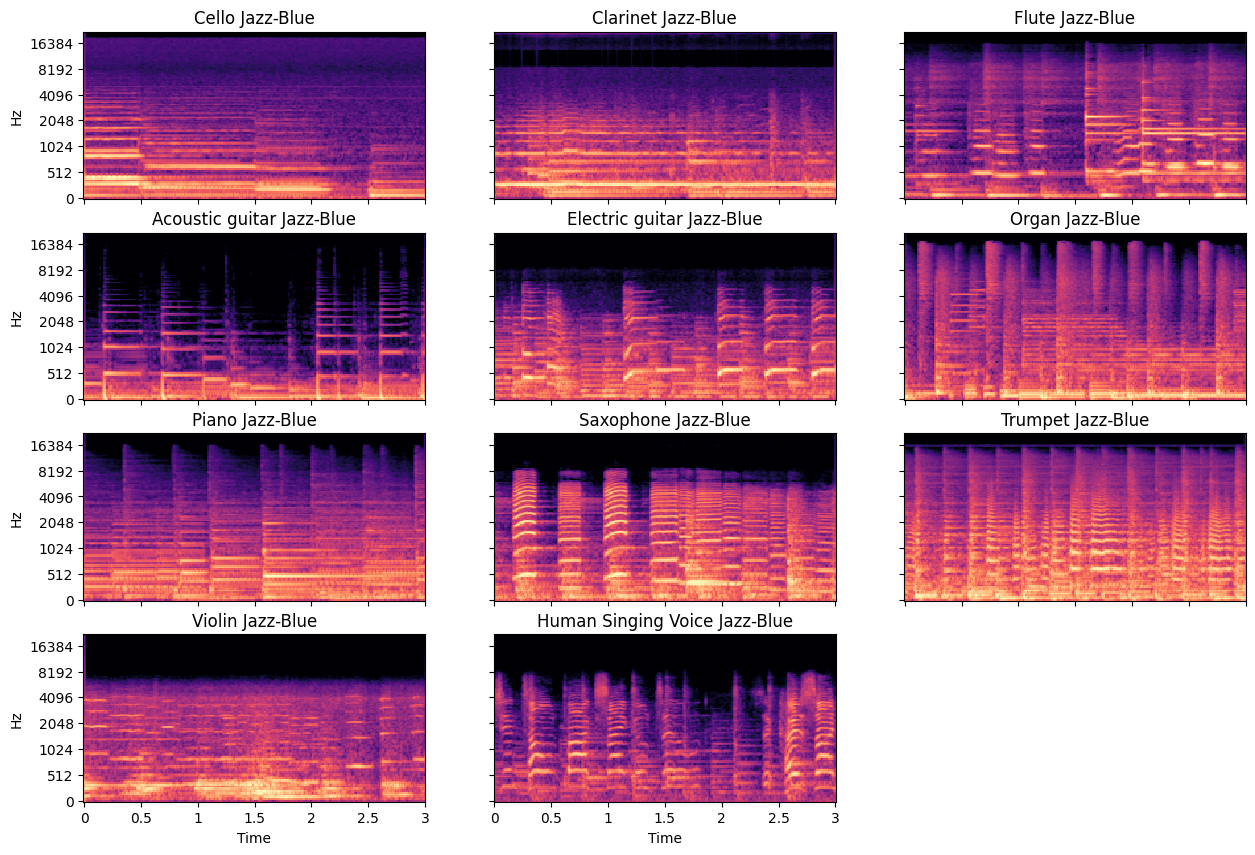

In [3]:
file_list = []
samplePath = os.path.abspath('./Sample/Sample_JazzBlue')

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), sharex=True, sharey=True)
file_list = [os.path.join(root, file) for root, _, files in os.walk(samplePath) for file in files]

for ax, file in zip(axs.flat, file_list):
    utils.draw_mel_gram(file, ax)

for ax in axs.flat[len(file_list):]:
    ax.set_visible(False)  # Hide unused subplots

plt.show()



NameError: name 'draw_mel_gram' is not defined

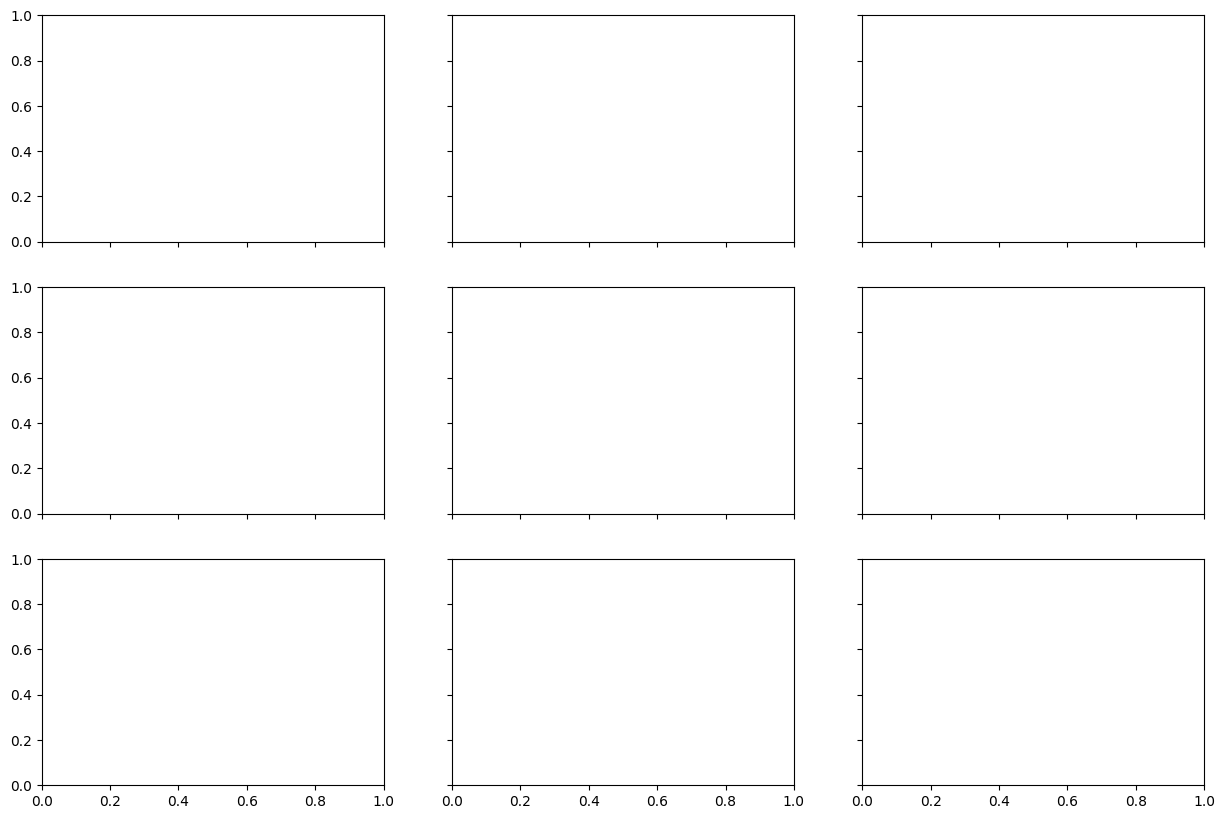

In [4]:
file_list = []
samplePath = os.path.abspath('./Sample/Sample_AcoGuitar')

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharex=True, sharey=True)
file_list = [os.path.join(root, file) for root, _, files in os.walk(samplePath) for file in files]

for ax, file in zip(axs.flat, file_list):
    utils.draw_mel_gram(file, ax)


plt.show()
        

        

